# Visualização da Informação

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

# Custo de Universidades Internacionais

## Descrição do Dataset

Esse dataset é um compilado de várias universidades ao redor do mundo com o curso (`Program`), nível (`Level`), duração (`Duration_Years`) e demais informações de custo acerca de valor do curso até custos de moradia e imigração.

In [92]:
# https://www.kaggle.com/datasets/adilshamim8/cost-of-international-education
URL_DATASET = "https://www.kaggle.com/api/v1/datasets/download/adilshamim8/cost-of-international-education"

In [93]:
df = pd.read_csv(URL_DATASET, compression="zip")
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


## Análise inicial de estatística básica

In [95]:
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [96]:
dfByCountryTuition = df[["Country","Tuition_USD"]].groupby(by="Country", as_index=False).mean()
dfByCountryTuition.head()

,Country,Tuition_USD
0,Algeria,1100.000000
1,Argentina,0.000000
2,Australia,34610.465116
3,Austria,1500.000000
4,Bahrain,7600.000000


## Gráfico de Barras

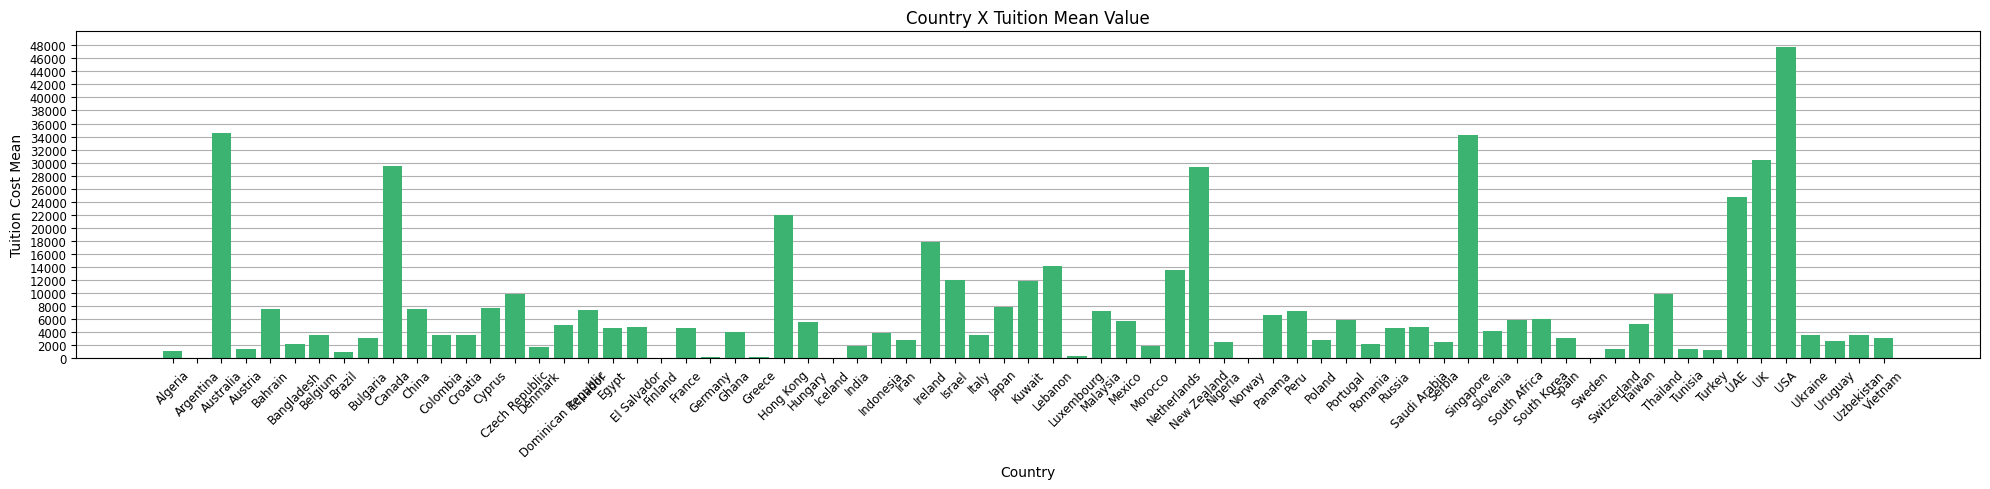

In [97]:
# Values for axes x and y
x = dfByCountryTuition["Country"]
y = dfByCountryTuition["Tuition_USD"]

# Getting image to plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)

# Set titles
ax.set_title("Country X Tuition Mean Value")
ax.set_xlabel("Country")
ax.set_ylabel("Tuition Cost Mean")

# Set values to show on y axis
ytick = np.arange(dfByCountryTuition["Tuition_USD"].min(), dfByCountryTuition["Tuition_USD"].max()+2000, 2000)
ax.set_yticks(ytick)

# Change display configuration on axes
ax.tick_params("x", labelsize="small", rotation=45)
ax.tick_params("y", labelsize="small")

# Put grid
ax.grid(axis="y")
ax.set_axisbelow(True) # put grid behing chart

# Show chart
ax.bar(x, y, color="mediumseagreen")
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## Treemap

In [98]:
dfByCountryCountUniversity = df[["Country","University"]].groupby(by="Country", as_index=False).count()
dfByCountryCountUniversity.rename(columns={"University": "Count_Universities"}, inplace=True)
dfByCountryCountUniversity = dfByCountryCountUniversity.sort_values(by="Count_Universities", ascending=False)
dfByCountryCountUniversity.head()

,Country,Count_Universities
65,UK,93
2,Australia,86
66,USA,78
9,Canada,76
22,Germany,33


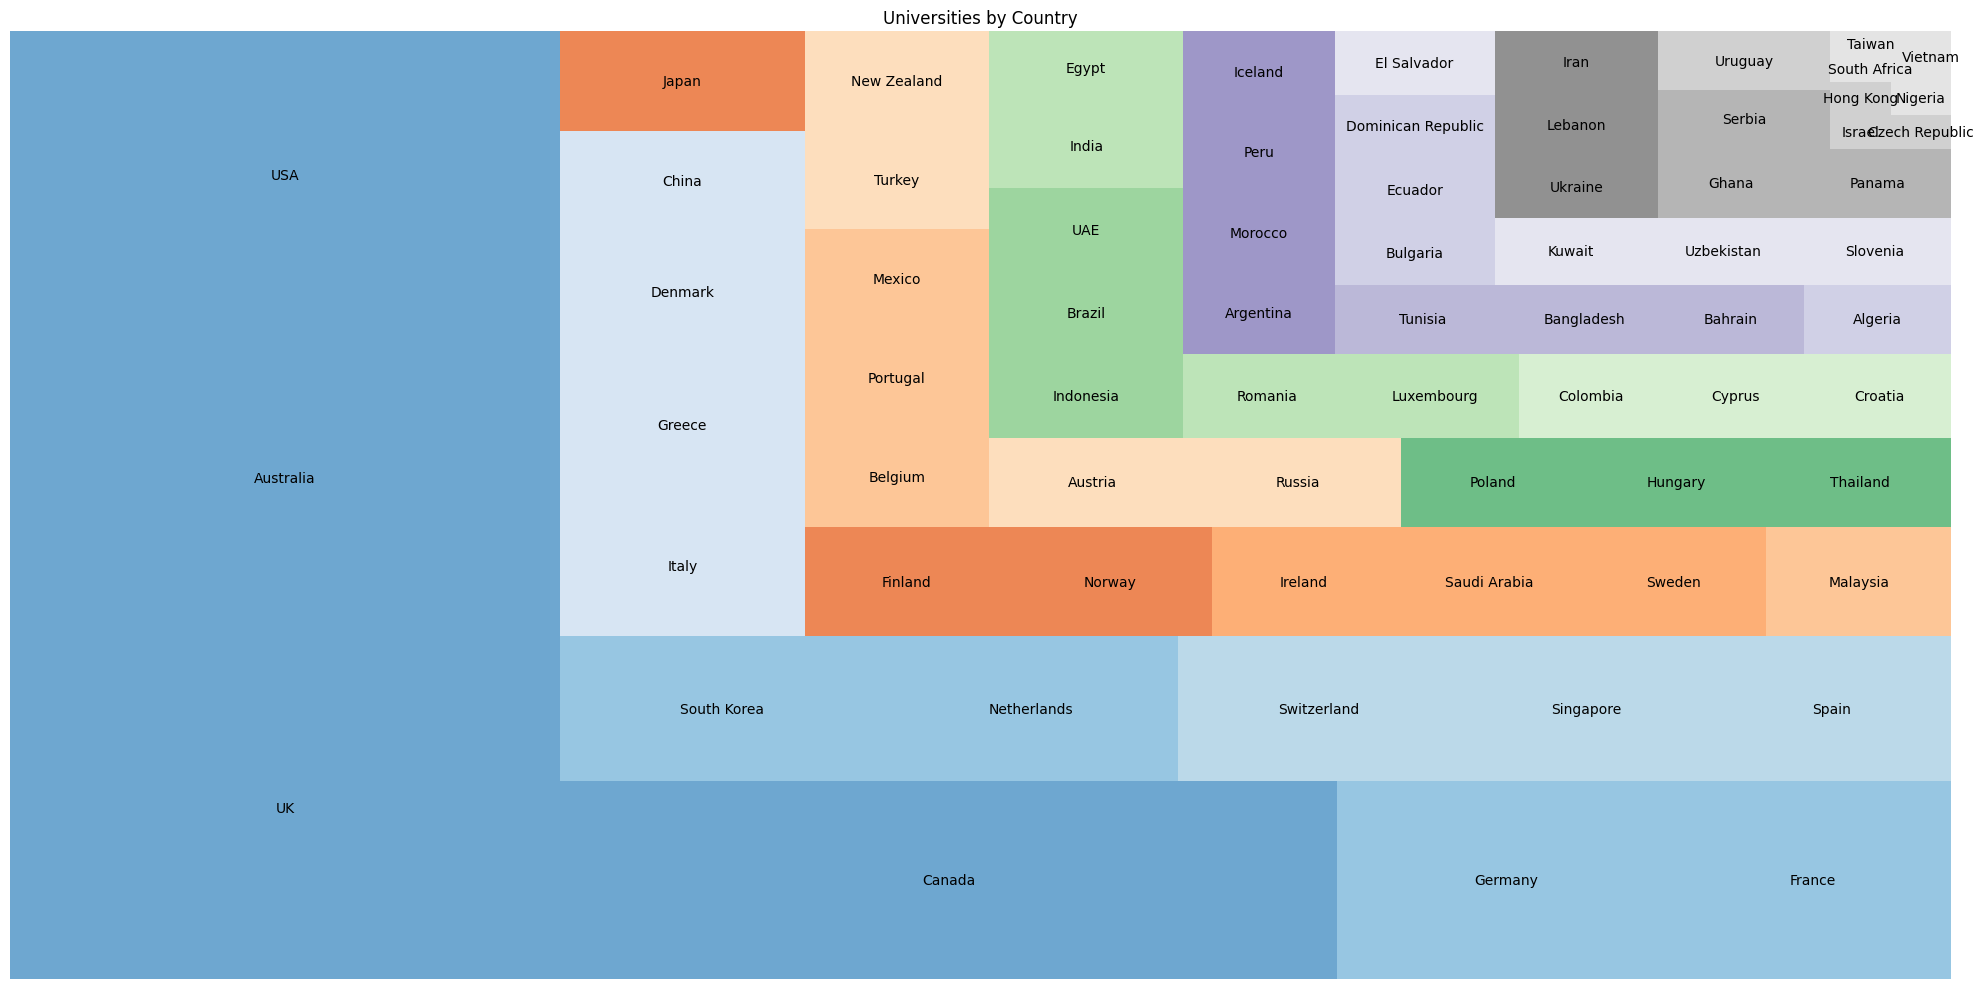

In [99]:
sizes = dfByCountryCountUniversity["Count_Universities"]
labels = dfByCountryCountUniversity["Country"]
colors = plt.cm.tab20c(np.linspace(0, 1, len(sizes)))
plt.figure(figsize=(20, 10))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=colors)
plt.title("Universities by Country")
plt.axis('off')  # Hide the axes
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## Choropleths

In [100]:
import plotly.graph_objects as go

In [102]:
countrys = dfByCountryCountUniversity["Country"].values
data = dict(
	type="choropleth",
	locations=countrys,
	colorscale="Viridis",
	reversescale=True,
	locationmode="country names",
	z=dfByCountryCountUniversity["Count_Universities"].values,
	colorbar=dict(title="Number of Universities"),
)
map = go.Figure(data=[data])
map.update_layout(
	title_text="Number of Universities by Country",
	title_x=0.5,
	geo=dict(
		showcoastlines=True,
		coastlinecolor="Black",
		showland=True,
		landcolor="LightGray",
	),
)
map.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# The Society of Friends

## Descrição do Dataset

Esse dataset corresponde ao Quakers, uma sociedade de amigos que existiu na Inglaterra no século 17.

In [ ]:
# https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python
URL_QUAKERS_NODE_LIST = "https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_nodelist.csv"
URL_QUAKERS_EDGE_LIST = "https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_edgelist.csv"

In [ ]:
import csv
from urllib.request import urlopen
import networkx as nx

In [ ]:
with urlopen(URL_QUAKERS_NODE_LIST) as response:
	reader = csv.reader(response.read().decode('utf-8').splitlines()) # Decode bytes to string and split into lines
	nodes = list(reader)[1:] # Get list of lines, skipping the header
	node_names = [row[0] for row in nodes]  # Extract the first column (node names)
	print("Node names:", node_names)
	print(nodes)

Node names: ['Joseph Wyeth', 'Alexander Skene of Newtyle', 'James Logan', 'Dorcas Erbery', 'Lilias Skene', 'William Mucklow', 'Thomas Salthouse', 'William Dewsbury', 'John Audland', 'Richard Claridge', 'William Bradford', 'Fettiplace Bellers', 'John Bellers', 'Isabel Yeamans', 'George Fox the younger', 'George Fox', 'John Stubbs', 'Anne Camm', 'John Camm', 'Thomas Camm', 'Katharine Evans', 'Lydia Lancaster', 'Samuel Clarridge', 'Thomas Lower', 'Gervase Benson', 'Stephen Crisp', 'James Claypoole', 'Thomas Holme', 'John Freame', 'John Swinton', 'William Mead', 'Henry Pickworth', 'John Crook', 'Gilbert Latey', 'Ellis Hookes', 'Joseph Besse', 'James Nayler', 'Elizabeth Hooten', 'George Whitehead', 'John Whitehead', 'William Crouch', 'Benjamin Furly', 'Silvanus Bevan', 'Robert Rich', 'John Whiting', 'Christopher Taylor', 'Thomas Lawson', 'Richard Farnworth', 'William Coddington', 'Thomas Taylor', 'Richard Vickris', 'Robert Barclay', 'Jane Sowle', 'Tace Sowle', 'Leonard Fell', 'Margaret Fell

In [ ]:
with urlopen(URL_QUAKERS_EDGE_LIST) as response:
	reader = csv.reader(response.read().decode('utf-8').splitlines()) # Decode bytes to string and split into lines
	edges = [tuple(row) for row in list(reader)[1:]]  # Skip the header and convert to tuples
	print(edges)

[('George Keith', 'Robert Barclay'), ('George Keith', 'Benjamin Furly'), ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'), ('George Keith', 'Franciscus Mercurius van Helmont'), ('George Keith', 'William Penn'), ('George Keith', 'George Fox'), ('George Keith', 'George Whitehead'), ('George Keith', 'William Bradford'), ('James Parnel', 'Benjamin Furly'), ('James Parnel', 'Stephen Crisp'), ('Peter Collinson', 'John Bartram'), ('Peter Collinson', 'James Logan'), ('Joseph Wyeth', 'Thomas Ellwood'), ('Alexander Skene of Newtyle', 'Lilias Skene'), ('Dorcas Erbery', 'James Nayler'), ('William Mucklow', 'George Fox'), ('Franciscus Mercurius van Helmont', 'Benjamin Furly'), ('William Dewsbury', 'Edward Burrough'), ('William Dewsbury', 'George Fox'), ('William Dewsbury', 'John Crook'), ('John Audland', 'John Camm'), ('John Audland', 'Francis Howgill'), ('John Audland', 'Edward Pyott'), ('John Audland', 'Charles Marshall'), ('John Audland', 'George Fox'), ('John Audland', 'Anne Ca

## Grafos

Graph with 119 nodes and 174 edges


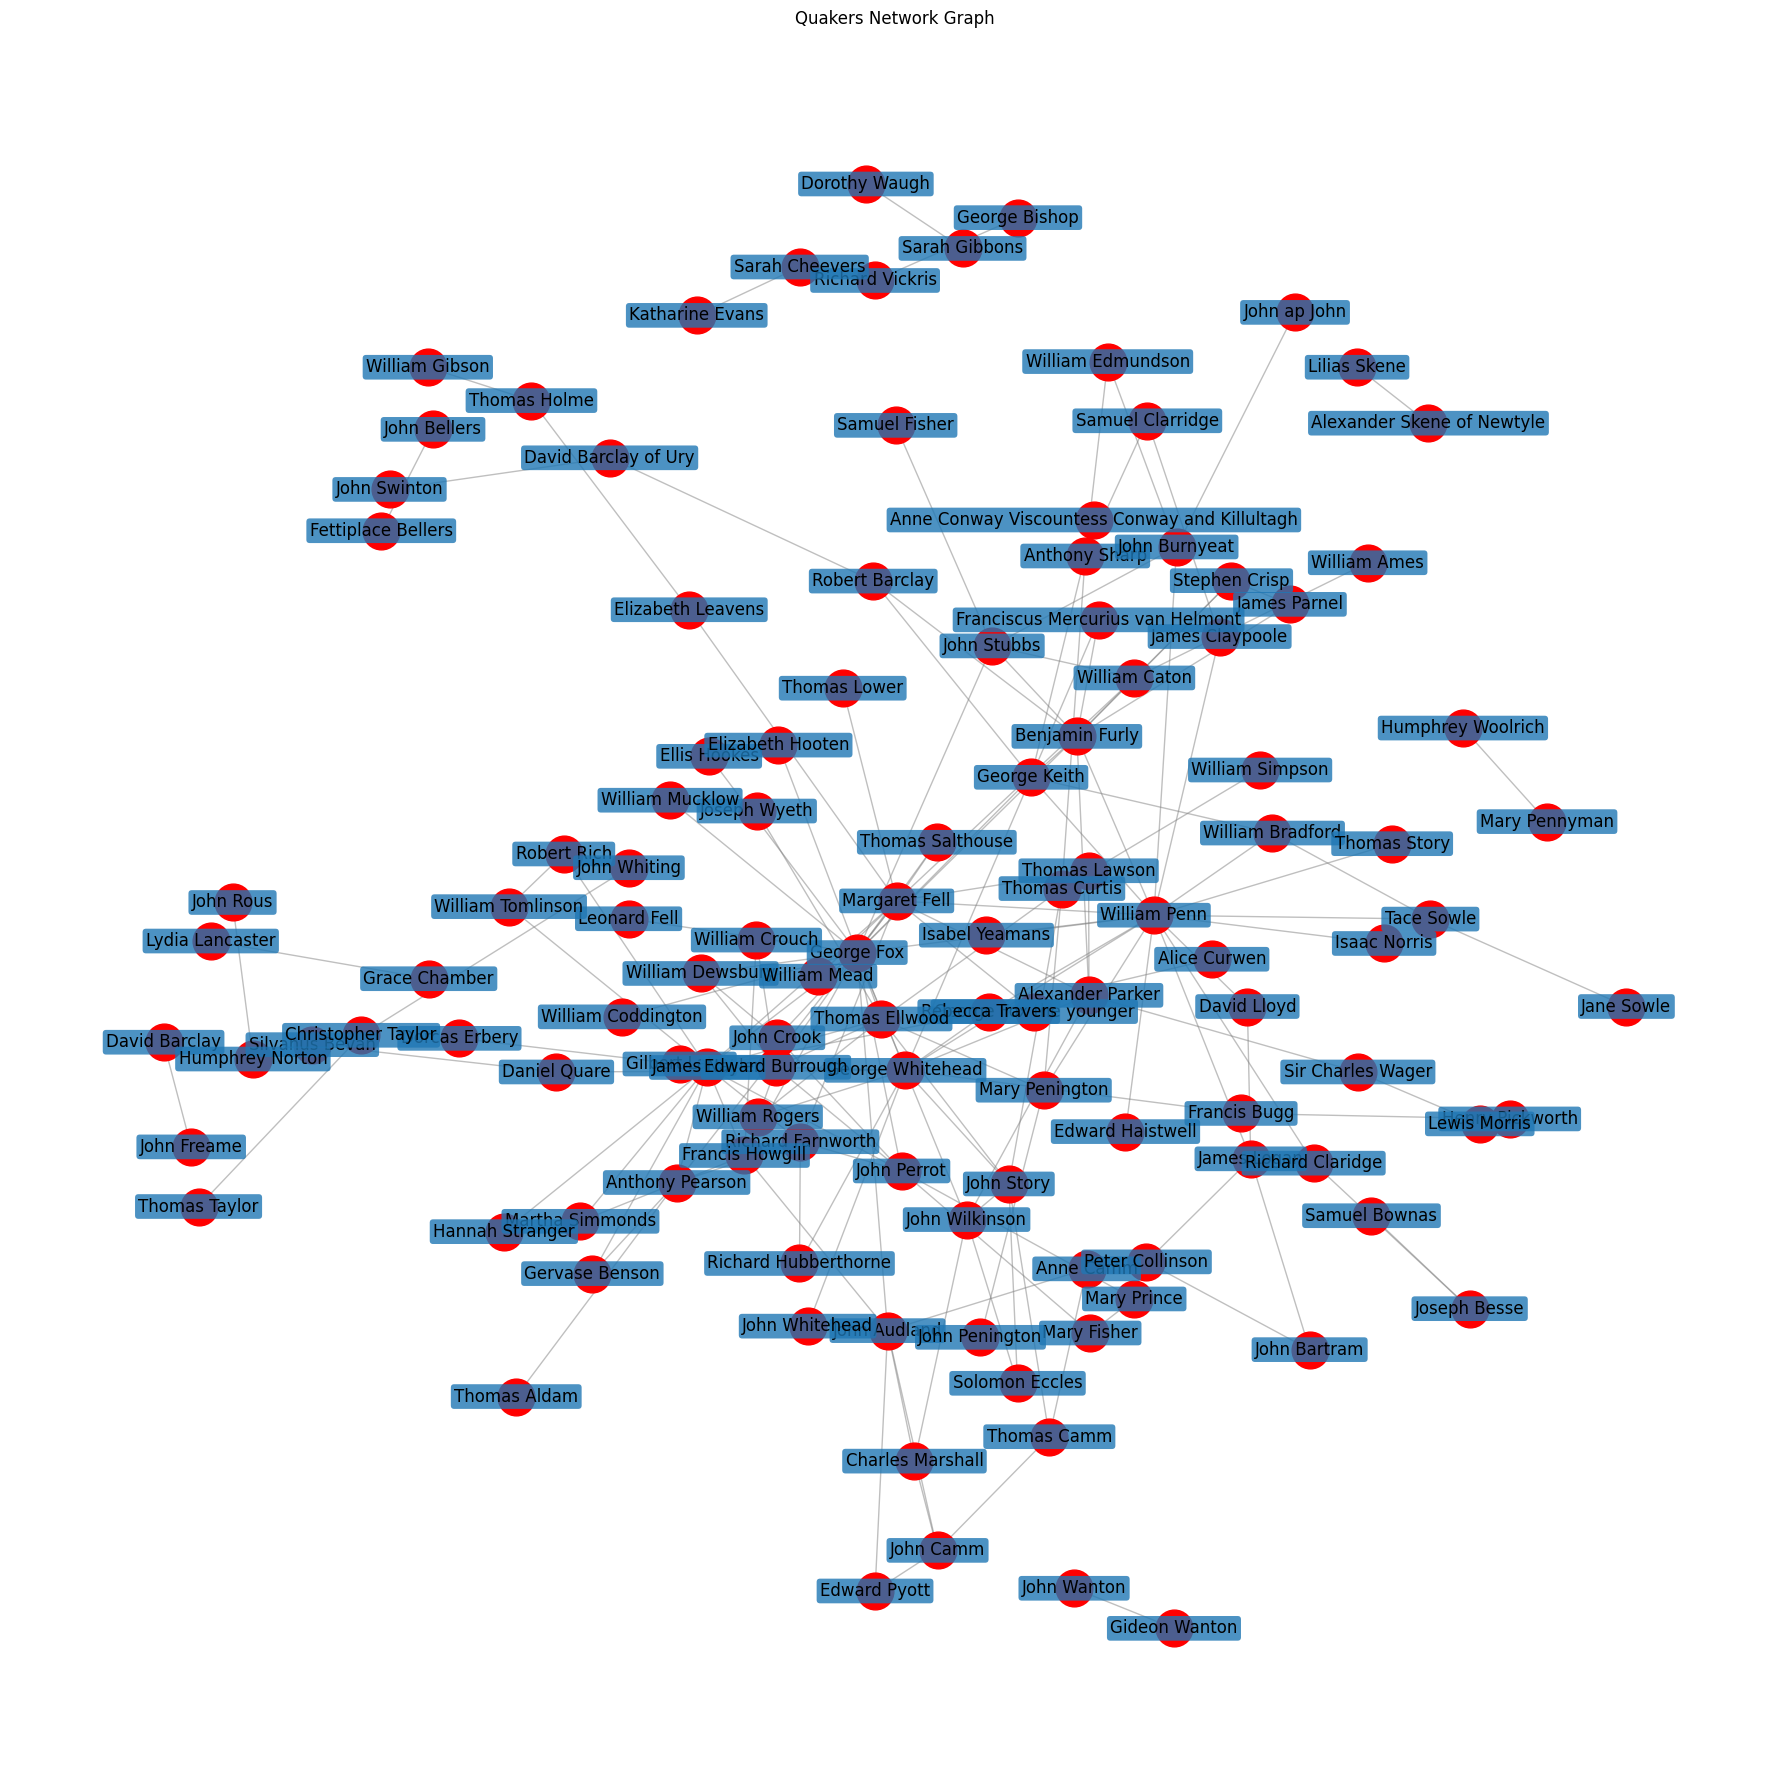

In [ ]:
g = nx.Graph()
g.add_nodes_from(node_names)
g.add_edges_from(edges)
print(g)

plt.figure(figsize=(18, 18))
pos = nx.spring_layout(g, k=0.3, seed=42)  # More spread out

# Draw nodes and edges
nx.draw_networkx_nodes(g, pos, node_size=700, node_color="red")
nx.draw_networkx_edges(g, pos, edge_color="gray", alpha=0.5)

# Draw labels with white outline for better readability
nx.draw_networkx_labels(
	g, pos,
	font_size=12,
	font_color="black",
	font_family="sans-serif",
	bbox=dict(edgecolor="none", boxstyle="round,pad=0.2", alpha=0.8)
)

plt.title("Quakers Network Graph")
plt.axis("off")
plt.tight_layout()
plt.show()